In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
iphone_data = pd.read_csv('iphone4s_reviews.csv')
iphone_data

,Unnamed: 0,Reviews
0,0,"If to say in a nutshell, product is MORE THAN ..."
1,1,Ordered this product on 8th of July and I rece...
2,2,"Pros : touch is great, phone response time is ..."
3,3,Can be A very good gifts to older peoples.... ...
4,4,"Buy, if your Budget is below 13K.I am using th..."
...,...,...
17489,1550,"Very fast/quicker delivery, I get it next day...."
17490,1551,Flipakrt is trying to make fool out of custome...
17491,1552,Nice phone
17492,1553,Good product with great battery standby time a...


In [3]:
iphone_data.drop(['Unnamed: 0'],axis=1,inplace = True)

In [4]:
iphone_data

,Reviews
0,"If to say in a nutshell, product is MORE THAN ..."
1,Ordered this product on 8th of July and I rece...
2,"Pros : touch is great, phone response time is ..."
3,Can be A very good gifts to older peoples.... ...
4,"Buy, if your Budget is below 13K.I am using th..."
...,...
17489,"Very fast/quicker delivery, I get it next day...."
17490,Flipakrt is trying to make fool out of custome...
17491,Nice phone
17492,Good product with great battery standby time a...


In [5]:
iphone_data.shape

(17494, 1)

In [6]:
# to check whether any null values are there are not
iphone_data.isna().sum() 

Reviews    1
dtype: int64

In [7]:
iphone_Data = iphone_data.dropna()

In [8]:
iphone_Data.shape

(17493, 1)

In [9]:
iphone_Data.describe()

,Reviews
count,17493
unique,17360
top,Good
freq,30


In [10]:
iphone_Data[iphone_Data.duplicated()].shape    # check whether any null values or not

(133, 1)

In [11]:
iphone_Data.drop_duplicates(inplace = True)

In [12]:
iphone_Data.shape

(17360, 1)

In [13]:
iphone_Data.dtypes

Reviews    object
dtype: object

# NLP-NATURAL LANGUAGE PROCESSING PIPELINE

## 1. Removing Stopwords,Punctuations,URL's,emojis

In [14]:
from nltk.stem import PorterStemmer,WordNetLemmatizer


In [15]:
def number_to_text(data):
    temp_str = data.split()
    string = []
    for i in temp_str:

    # if the word is digit, converted to
    # word else the sequence continues

        if i.isdigit():
            temp = inflect.engine().number_to_words(i)
            string.append(temp)
        else:
            string.append(i)
    outputStr = " ".join(string)
    return outputStr

In [16]:
ps = PorterStemmer()
def stem_text(data):
    tokens = word_tokenize(data)
    stemmed_tokens = [ps.stem(word) for word in tokens if word not in (stop_words)]
    return " ".join(stemmed_tokens)

In [17]:
lemma = WordNetLemmatizer()
def lemmatiz_text(data):    
    tokens = word_tokenize(data)
    lemma_tokens = [lemma.lemmatize(word, pos='v') for word in tokens if word not in (stop_words)]
    return " ".join(lemma_tokens)

In [18]:
def cleantext(text):
    text = re.sub(r'[^\w\s]', " ", text) # Remove punctuations
    text = re.sub(r"https?:\/\/\S+", ",", text) # Remove The Hyper Lin
    text = contractions.fix(text) # remove contractions 
    text = number_to_text(text) # convert numbers to text    
    text = text.lower() # convert to lower case
    
    # don't feel it's worth to use stemming as it may lead to some wrong words
    
    text = lemmatiz_text(text) # lemmatization
    
    return text

In [19]:
import re
import contractions
import inflect
from wordcloud import WordCloud
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [20]:
stop_words = stopwords.words('english') # remove stop words

iphone_Data['cleaned_reviews']=iphone_Data['Reviews'].apply(cleantext)
iphone_Data

,Reviews,cleaned_reviews
0,"If to say in a nutshell, product is MORE THAN ...",say nutshell product excellent experience say ...
1,Ordered this product on 8th of July and I rece...,order product 8th july receive 9th pros con pr...
2,"Pros : touch is great, phone response time is ...",pros touch great phone response time superb du...
3,Can be A very good gifts to older peoples.... ...,good gift older people need much memory space ...
4,"Buy, if your Budget is below 13K.I am using th...",buy budget 13k use iphone 4s ten months feel t...
...,...,...
17488,Awesome phone in this price range,awesome phone price range
17489,"Very fast/quicker delivery, I get it next day....",fast quicker delivery get next day imagine del...
17490,Flipakrt is trying to make fool out of custome...,flipakrt try make fool customers arrange mobil...
17492,Good product with great battery standby time a...,good product great battery standby time also n...


In [21]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stopwords_set = set(stop_words)
cleaned_reviews = []

for index, row in iphone_Data.iterrows():
    
    # filerting out all the stopwords
    
    words_without_stopwords = [word for word in row.cleaned_reviews.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # creating tweets list of tuples containing stopwords(list) and sentimentType
    
    cleaned_reviews.append(' '.join(words_without_stopwords))
    
iphone_Data['cleaned_reviews'] = cleaned_reviews
iphone_Data.head(20)

,Reviews,cleaned_reviews
0,"If to say in a nutshell, product is MORE THAN ...",say nutshell product excellent experience say ...
1,Ordered this product on 8th of July and I rece...,order product 8th july receive 9th pros con pr...
2,"Pros : touch is great, phone response time is ...",pros touch great phone response time superb du...
3,Can be A very good gifts to older peoples.... ...,good gift older people need much memory space ...
4,"Buy, if your Budget is below 13K.I am using th...",buy budget 13k use iphone 4s ten months feel t...
5,This phone has problems with the signal recept...,phone problems signal reception even phone sho...
6,It was a wonderful feeling to have my first IP...,wonderful feel first iphone inform everybody u...
7,Very good phone. iOS does not upgrade more tha...,good phone ios upgrade nine really nice time r...
8,"Awesome phone at compare android and windows, ...",awesome phone compare android windows battery ...
9,Iphone 4S is good but ROM size is too low. why...,iphone 4s good rom size low mean give eight gb...


In [23]:
# removing the accents

from unicodedata import normalize

remove_accent = lambda text: normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8", "ignore")

iphone_Data["cleaned_reviews"] = iphone_Data["cleaned_reviews"].apply(remove_accent)
iphone_Data.head(20)

,Reviews,cleaned_reviews
0,"If to say in a nutshell, product is MORE THAN ...",say nutshell product excellent experience say ...
1,Ordered this product on 8th of July and I rece...,order product 8th july receive 9th pros con pr...
2,"Pros : touch is great, phone response time is ...",pros touch great phone response time superb du...
3,Can be A very good gifts to older peoples.... ...,good gift older people need much memory space ...
4,"Buy, if your Budget is below 13K.I am using th...",buy budget 13k use iphone 4s ten months feel t...
5,This phone has problems with the signal recept...,phone problems signal reception even phone sho...
6,It was a wonderful feeling to have my first IP...,wonderful feel first iphone inform everybody u...
7,Very good phone. iOS does not upgrade more tha...,good phone ios upgrade nine really nice time r...
8,"Awesome phone at compare android and windows, ...",awesome phone compare android windows battery ...
9,Iphone 4S is good but ROM size is too low. why...,iphone 4s good rom size low mean give eight gb...


In [24]:
# removing empty text spaces

iphone_Data=iphone_Data[iphone_Data['cleaned_reviews']!='']
iphone_Data

,Reviews,cleaned_reviews
0,"If to say in a nutshell, product is MORE THAN ...",say nutshell product excellent experience say ...
1,Ordered this product on 8th of July and I rece...,order product 8th july receive 9th pros con pr...
2,"Pros : touch is great, phone response time is ...",pros touch great phone response time superb du...
3,Can be A very good gifts to older peoples.... ...,good gift older people need much memory space ...
4,"Buy, if your Budget is below 13K.I am using th...",buy budget 13k use iphone 4s ten months feel t...
...,...,...
17488,Awesome phone in this price range,awesome phone price range
17489,"Very fast/quicker delivery, I get it next day....",fast quicker delivery get next day imagine del...
17490,Flipakrt is trying to make fool out of custome...,flipakrt try make fool customers arrange mobil...
17492,Good product with great battery standby time a...,good product great battery standby time also n...


In [25]:
# removing hyperlinks
cleaned_reviews= []

for index,row in iphone_Data.iterrows():
    
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.cleaned_reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

iphone_Data['cleaned_reviews'] = cleaned_reviews
iphone_Data.head(20)

,Reviews,cleaned_reviews
0,"If to say in a nutshell, product is MORE THAN ...",say nutshell product excellent experience say ...
1,Ordered this product on 8th of July and I rece...,order product 8th july receive 9th pros con pr...
2,"Pros : touch is great, phone response time is ...",pros touch great phone response time superb du...
3,Can be A very good gifts to older peoples.... ...,good gift older people need much memory space ...
4,"Buy, if your Budget is below 13K.I am using th...",buy budget 13k use iphone 4s ten months feel t...
5,This phone has problems with the signal recept...,phone problems signal reception even phone sho...
6,It was a wonderful feeling to have my first IP...,wonderful feel first iphone inform everybody u...
7,Very good phone. iOS does not upgrade more tha...,good phone ios upgrade nine really nice time r...
8,"Awesome phone at compare android and windows, ...",awesome phone compare android windows battery ...
9,Iphone 4S is good but ROM size is too low. why...,iphone 4s good rom size low mean give eight gb...


## 2. Tokenization 

In [26]:
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
iphone_Data['Tokens'] = iphone_Data.apply(lambda row: nltk.word_tokenize(row['cleaned_reviews']), axis=1)
iphone_Data.head(10)

,Reviews,cleaned_reviews,Tokens
0,"If to say in a nutshell, product is MORE THAN ...",say nutshell product excellent experience say ...,"[say, nutshell, product, excellent, experience..."
1,Ordered this product on 8th of July and I rece...,order product 8th july receive 9th pros con pr...,"[order, product, 8th, july, receive, 9th, pros..."
2,"Pros : touch is great, phone response time is ...",pros touch great phone response time superb du...,"[pros, touch, great, phone, response, time, su..."
3,Can be A very good gifts to older peoples.... ...,good gift older people need much memory space ...,"[good, gift, older, people, need, much, memory..."
4,"Buy, if your Budget is below 13K.I am using th...",buy budget 13k use iphone 4s ten months feel t...,"[buy, budget, 13k, use, iphone, 4s, ten, month..."
5,This phone has problems with the signal recept...,phone problems signal reception even phone sho...,"[phone, problems, signal, reception, even, pho..."
6,It was a wonderful feeling to have my first IP...,wonderful feel first iphone inform everybody u...,"[wonderful, feel, first, iphone, inform, every..."
7,Very good phone. iOS does not upgrade more tha...,good phone ios upgrade nine really nice time r...,"[good, phone, ios, upgrade, nine, really, nice..."
8,"Awesome phone at compare android and windows, ...",awesome phone compare android windows battery ...,"[awesome, phone, compare, android, windows, ba..."
9,Iphone 4S is good but ROM size is too low. why...,iphone 4s good rom size low mean give eight gb...,"[iphone, 4s, good, rom, size, low, mean, give,..."


## 3.Parts of Speech(POS) Labelling

In [27]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [28]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [29]:
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [30]:
pos_dict = {'J' :wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN,'R':wordnet.ADV}

In [31]:
def tokens_pos(text):
    tags = pos_tag(text)
    newlist=[]
    for word,tag in tags:
        newlist.append(tuple([word,pos_dict.get(tag[0])]))
    return newlist

In [32]:
iphone_Data['POS_Tagging'] = iphone_Data['Tokens'].apply(tokens_pos)
iphone_Data.head(20)

,Reviews,cleaned_reviews,Tokens,POS_Tagging
0,"If to say in a nutshell, product is MORE THAN ...",say nutshell product excellent experience say ...,"[say, nutshell, product, excellent, experience...","[(say, v), (nutshell, a), (product, n), (excel..."
1,Ordered this product on 8th of July and I rece...,order product 8th july receive 9th pros con pr...,"[order, product, 8th, july, receive, 9th, pros...","[(order, n), (product, n), (8th, None), (july,..."
2,"Pros : touch is great, phone response time is ...",pros touch great phone response time superb du...,"[pros, touch, great, phone, response, time, su...","[(pros, n), (touch, a), (great, a), (phone, n)..."
3,Can be A very good gifts to older peoples.... ...,good gift older people need much memory space ...,"[good, gift, older, people, need, much, memory...","[(good, a), (gift, n), (older, a), (people, n)..."
4,"Buy, if your Budget is below 13K.I am using th...",buy budget 13k use iphone 4s ten months feel t...,"[buy, budget, 13k, use, iphone, 4s, ten, month...","[(buy, v), (budget, n), (13k, None), (use, n),..."
5,This phone has problems with the signal recept...,phone problems signal reception even phone sho...,"[phone, problems, signal, reception, even, pho...","[(phone, n), (problems, n), (signal, a), (rece..."
6,It was a wonderful feeling to have my first IP...,wonderful feel first iphone inform everybody u...,"[wonderful, feel, first, iphone, inform, every...","[(wonderful, a), (feel, n), (first, r), (iphon..."
7,Very good phone. iOS does not upgrade more tha...,good phone ios upgrade nine really nice time r...,"[good, phone, ios, upgrade, nine, really, nice...","[(good, a), (phone, n), (ios, n), (upgrade, a)..."
8,"Awesome phone at compare android and windows, ...",awesome phone compare android windows battery ...,"[awesome, phone, compare, android, windows, ba...","[(awesome, a), (phone, n), (compare, n), (andr..."
9,Iphone 4S is good but ROM size is too low. why...,iphone 4s good rom size low mean give eight gb...,"[iphone, 4s, good, rom, size, low, mean, give,...","[(iphone, n), (4s, None), (good, a), (rom, n),..."


## 4.Lemmatization

In [33]:
from nltk.stem import WordNetLemmatizer
word_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew=" "
    for word,pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = word_lemmatizer.lemmatize(word,pos=pos)
            lemma_rew= lemma_rew + " "+ lemma
    return lemma_rew

In [34]:
iphone_Data['Lemmas'] = iphone_Data['POS_Tagging'].apply(lemmatize)
iphone_Data.head(10)

,Reviews,cleaned_reviews,Tokens,POS_Tagging,Lemmas
0,"If to say in a nutshell, product is MORE THAN ...",say nutshell product excellent experience say ...,"[say, nutshell, product, excellent, experience...","[(say, v), (nutshell, a), (product, n), (excel...",say nutshell product excellent experience sa...
1,Ordered this product on 8th of July and I rece...,order product 8th july receive 9th pros con pr...,"[order, product, 8th, july, receive, 9th, pros...","[(order, n), (product, n), (8th, None), (july,...",order product 8th july receive 9th pro con p...
2,"Pros : touch is great, phone response time is ...",pros touch great phone response time superb du...,"[pros, touch, great, phone, response, time, su...","[(pros, n), (touch, a), (great, a), (phone, n)...",pro touch great phone response time superb d...
3,Can be A very good gifts to older peoples.... ...,good gift older people need much memory space ...,"[good, gift, older, people, need, much, memory...","[(good, a), (gift, n), (older, a), (people, n)...",good gift old people need much memory space ...
4,"Buy, if your Budget is below 13K.I am using th...",buy budget 13k use iphone 4s ten months feel t...,"[buy, budget, 13k, use, iphone, 4s, ten, month...","[(buy, v), (budget, n), (13k, None), (use, n),...",buy budget 13k use iphone 4s ten month feel ...
5,This phone has problems with the signal recept...,phone problems signal reception even phone sho...,"[phone, problems, signal, reception, even, pho...","[(phone, n), (problems, n), (signal, a), (rece...",phone problem signal reception even phone sh...
6,It was a wonderful feeling to have my first IP...,wonderful feel first iphone inform everybody u...,"[wonderful, feel, first, iphone, inform, every...","[(wonderful, a), (feel, n), (first, r), (iphon...",wonderful feel first iphone inform everybody...
7,Very good phone. iOS does not upgrade more tha...,good phone ios upgrade nine really nice time r...,"[good, phone, ios, upgrade, nine, really, nice...","[(good, a), (phone, n), (ios, n), (upgrade, a)...",good phone io upgrade nine really nice time ...
8,"Awesome phone at compare android and windows, ...",awesome phone compare android windows battery ...,"[awesome, phone, compare, android, windows, ba...","[(awesome, a), (phone, n), (compare, n), (andr...",awesome phone compare android windows batter...
9,Iphone 4S is good but ROM size is too low. why...,iphone 4s good rom size low mean give eight gb...,"[iphone, 4s, good, rom, size, low, mean, give,...","[(iphone, n), (4s, None), (good, a), (rom, n),...",iphone 4s good rom size low mean give eight ...


In [35]:
complete_review_string = " ".join ([rev for rev in iphone_Data["Lemmas"]])
words = nltk.word_tokenize(complete_review_string)

from nltk.probability import FreqDist
fdist = FreqDist(words)
print(fdist)

<FreqDist with 16640 samples and 380779 outcomes>


In [36]:
iphone_Data.shape

(17352, 5)

In [37]:
fdist.most_common(50)

[('phone', 11792),
 ('iphone', 11164),
 ('apple', 6097),
 ('4s', 5743),
 ('two', 5583),
 ('thousand', 4962),
 ('use', 4459),
 ('one', 4266),
 ('good', 3936),
 ('get', 3328),
 ('love', 3023),
 ('twelve', 2863),
 ('like', 2779),
 ('buy', 2572),
 ('five', 2291),
 ('four', 2138),
 ('hundred', 2133),
 ('great', 2121),
 ('android', 2071),
 ('product', 2042),
 ('go', 2028),
 ('best', 1960),
 ('new', 1893),
 ('work', 1864),
 ('time', 1863),
 ('battery', 1822),
 ('well', 1788),
 ('year', 1703),
 ('camera', 1655),
 ('anonymous', 1525),
 ('still', 1524),
 ('make', 1515),
 ('three', 1478),
 ('also', 1389),
 ('much', 1372),
 ('screen', 1359),
 ('would', 1342),
 ('really', 1333),
 ('even', 1333),
 ('samsung', 1321),
 ('say', 1318),
 ('eleven', 1236),
 ('want', 1196),
 ('apps', 1194),
 ('problem', 1172),
 ('need', 1171),
 ('think', 1168),
 ('know', 1157),
 ('come', 1152),
 ('io', 1119)]

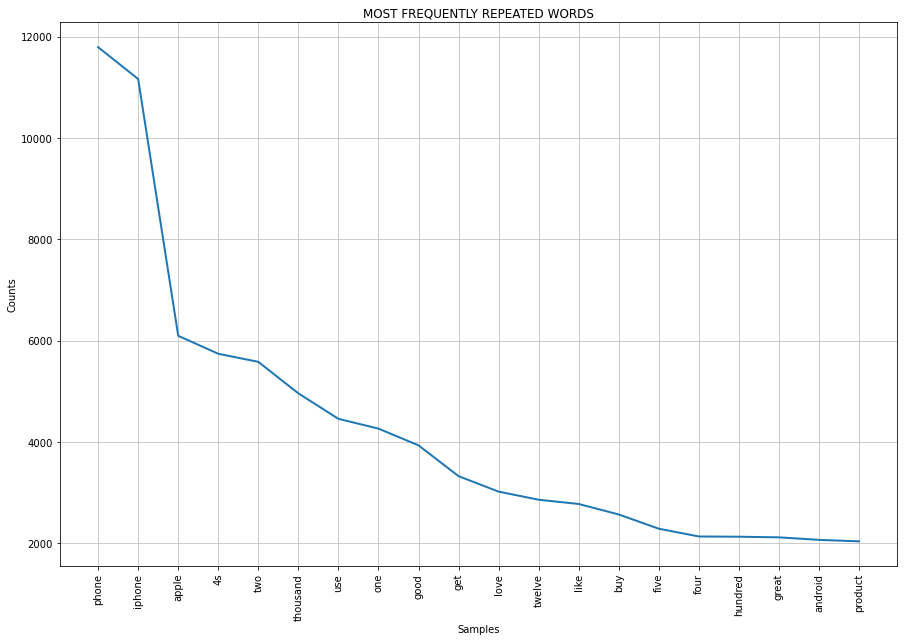

In [38]:
plt.figure(figsize=(15,10))
fdist.plot(20,cumulative=False,title='MOST FREQUENTLY REPEATED WORDS')
plt.show()

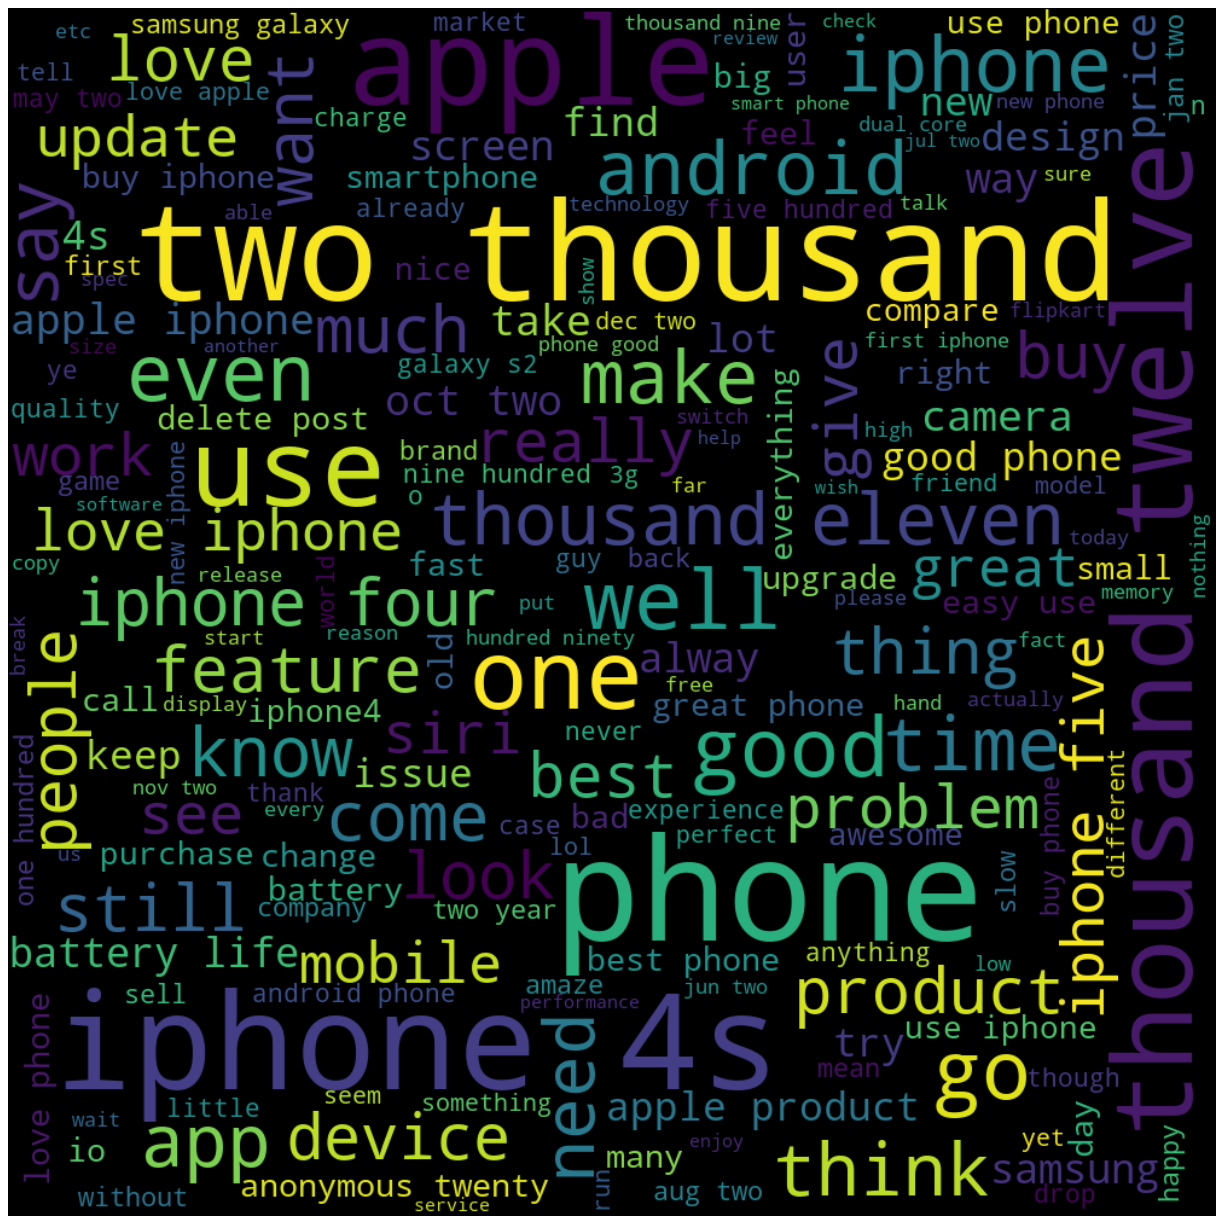

In [39]:
from wordcloud import WordCloud
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(complete_review_string)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

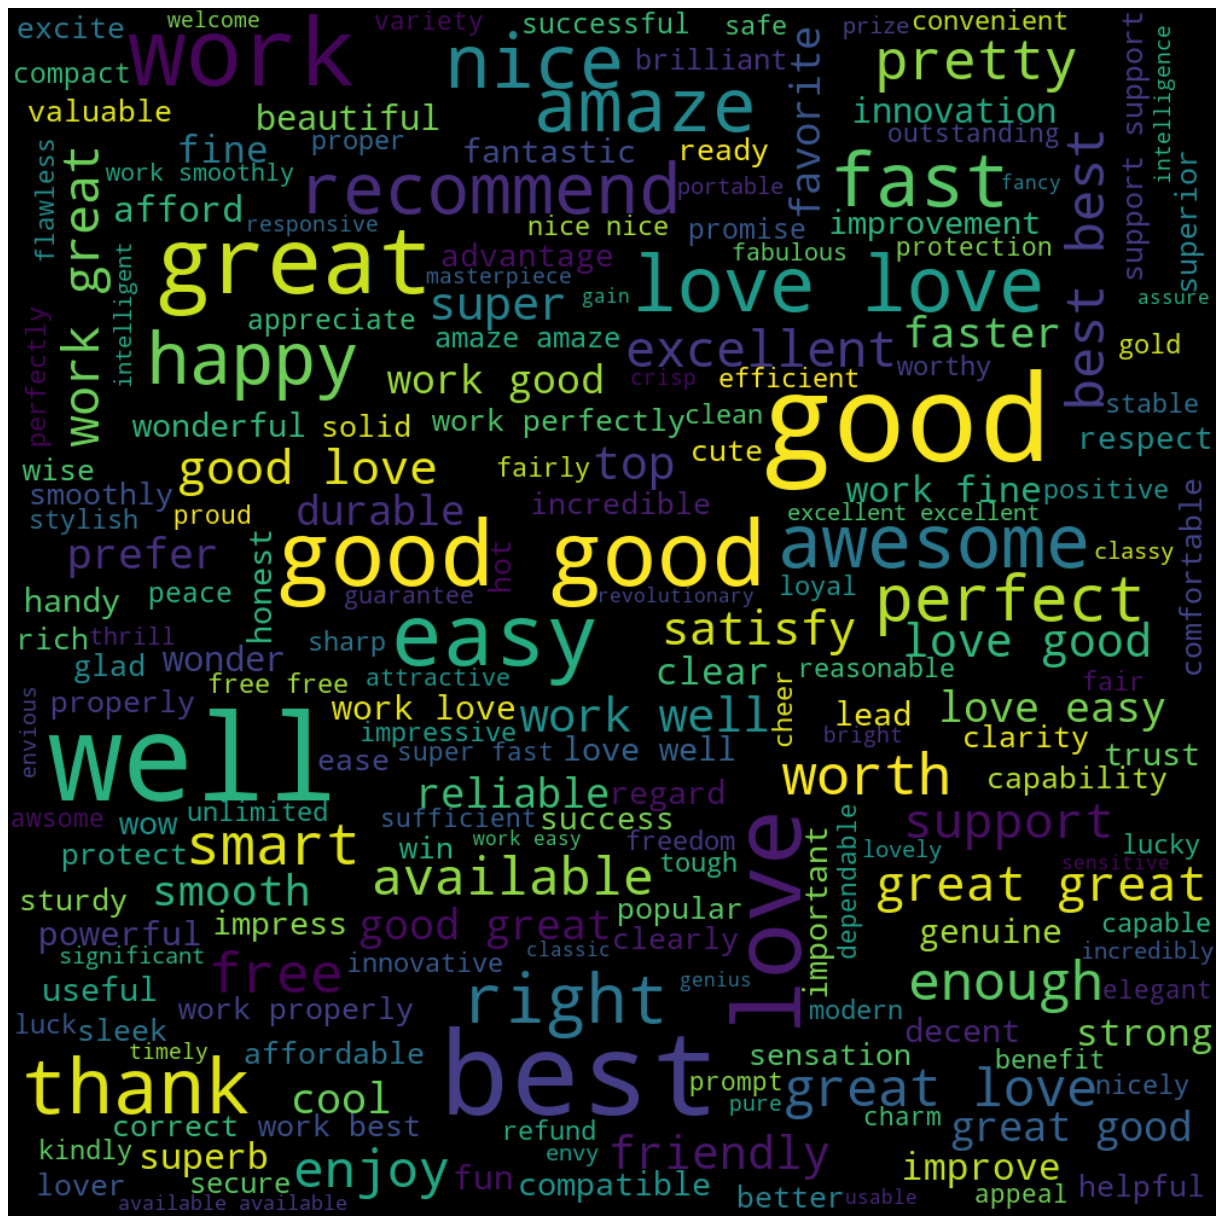

In [40]:
## positive words 
with open("positive-words (1).txt","r") as pos:
    poswords = pos.read().split("\n")  

review_pos = " ".join ([w for w in words if w in poswords])

wordCloudPos = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 100).generate(review_pos)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloudPos, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [41]:
pos_words = nltk.word_tokenize(review_pos)
fdistPos = FreqDist(pos_words)
fdistPos.most_common(50)

[('good', 3936),
 ('love', 3023),
 ('like', 2779),
 ('great', 2121),
 ('best', 1960),
 ('work', 1864),
 ('well', 1788),
 ('easy', 882),
 ('nice', 616),
 ('amaze', 606),
 ('fast', 577),
 ('thank', 559),
 ('awesome', 537),
 ('happy', 483),
 ('recommend', 470),
 ('right', 444),
 ('perfect', 404),
 ('free', 351),
 ('support', 351),
 ('smart', 330),
 ('worth', 322),
 ('pretty', 305),
 ('available', 297),
 ('enough', 288),
 ('excellent', 284),
 ('enjoy', 257),
 ('fine', 241),
 ('super', 234),
 ('satisfy', 211),
 ('faster', 203),
 ('friendly', 202),
 ('top', 196),
 ('cool', 190),
 ('smooth', 180),
 ('prefer', 175),
 ('durable', 157),
 ('reliable', 155),
 ('favorite', 152),
 ('clear', 131),
 ('improve', 123),
 ('strong', 118),
 ('afford', 113),
 ('superb', 110),
 ('wonder', 106),
 ('innovation', 106),
 ('beautiful', 105),
 ('powerful', 101),
 ('perfectly', 101),
 ('genuine', 100),
 ('properly', 96)]

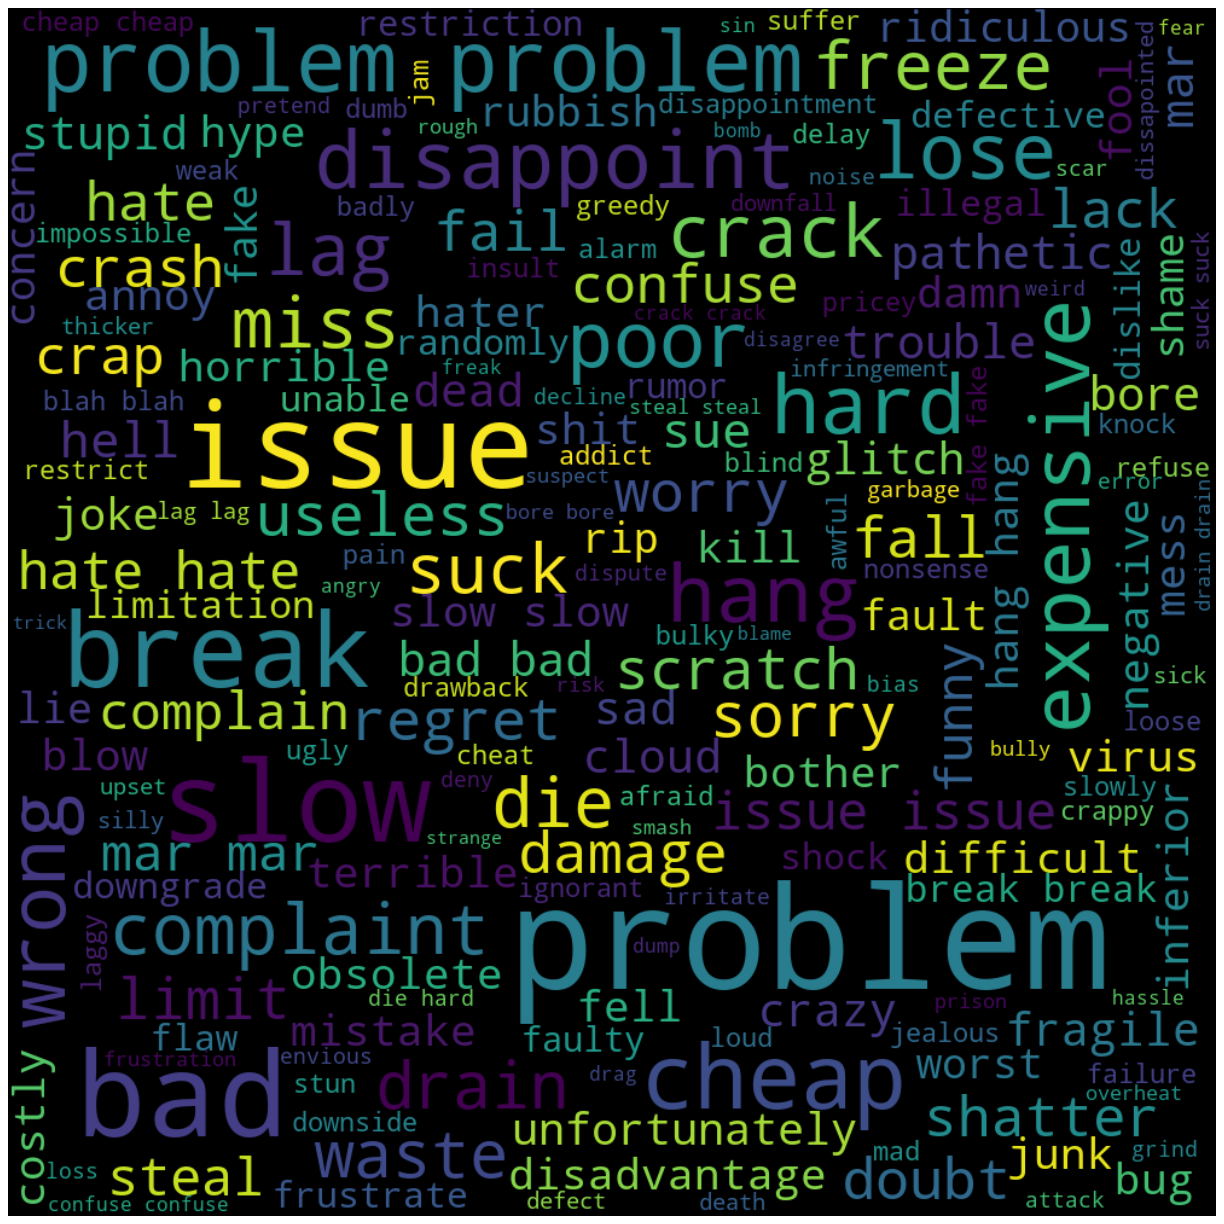

In [42]:
##Negative Words
with open("negative-words (2).txt","r") as pos:
    negwords = pos.read().split("\n")  

review_neg = " ".join ([w for w in words if w in negwords])

wordCloudNeg = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(review_neg)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloudNeg, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [43]:
neg_words = nltk.word_tokenize(review_neg)
fdistNeg = FreqDist(neg_words)
fdistNeg.most_common(50)

[('problem', 1172),
 ('issue', 631),
 ('bad', 586),
 ('slow', 512),
 ('break', 414),
 ('cheap', 301),
 ('hang', 287),
 ('hate', 247),
 ('mar', 221),
 ('hard', 219),
 ('expensive', 210),
 ('disappoint', 196),
 ('lag', 194),
 ('crack', 191),
 ('wrong', 190),
 ('poor', 186),
 ('lose', 184),
 ('suck', 182),
 ('drain', 160),
 ('die', 159),
 ('miss', 146),
 ('complaint', 140),
 ('freeze', 132),
 ('waste', 127),
 ('limit', 125),
 ('sorry', 119),
 ('confuse', 115),
 ('steal', 113),
 ('useless', 112),
 ('regret', 106),
 ('worry', 103),
 ('scratch', 102),
 ('fall', 102),
 ('bore', 99),
 ('damage', 99),
 ('crash', 95),
 ('doubt', 94),
 ('fail', 90),
 ('shatter', 89),
 ('sue', 89),
 ('lack', 86),
 ('fake', 85),
 ('crap', 84),
 ('complain', 77),
 ('stupid', 77),
 ('obsolete', 76),
 ('bug', 74),
 ('funny', 74),
 ('hell', 72),
 ('pathetic', 69)]

In [44]:
len(pos_words)

36753

In [45]:
len(neg_words)

16137

## Performing Sentimental Analysis by using Vader Sentiment Analyzer

In [46]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [47]:
iphone_Data.head()

,Reviews,cleaned_reviews,Tokens,POS_Tagging,Lemmas
0,"If to say in a nutshell, product is MORE THAN ...",say nutshell product excellent experience say ...,"[say, nutshell, product, excellent, experience...","[(say, v), (nutshell, a), (product, n), (excel...",say nutshell product excellent experience sa...
1,Ordered this product on 8th of July and I rece...,order product 8th july receive 9th pros con pr...,"[order, product, 8th, july, receive, 9th, pros...","[(order, n), (product, n), (8th, None), (july,...",order product 8th july receive 9th pro con p...
2,"Pros : touch is great, phone response time is ...",pros touch great phone response time superb du...,"[pros, touch, great, phone, response, time, su...","[(pros, n), (touch, a), (great, a), (phone, n)...",pro touch great phone response time superb d...
3,Can be A very good gifts to older peoples.... ...,good gift older people need much memory space ...,"[good, gift, older, people, need, much, memory...","[(good, a), (gift, n), (older, a), (people, n)...",good gift old people need much memory space ...
4,"Buy, if your Budget is below 13K.I am using th...",buy budget 13k use iphone 4s ten months feel t...,"[buy, budget, 13k, use, iphone, 4s, ten, month...","[(buy, v), (budget, n), (13k, None), (use, n),...",buy budget 13k use iphone 4s ten month feel ...


In [48]:
sent_analyser = SentimentIntensityAnalyzer()
iphone_Data["sentiments"] = iphone_Data["cleaned_reviews"].apply(lambda x: sent_analyser.polarity_scores(x))
iphone_Data = pd.concat([iphone_Data.drop(['sentiments'], axis=1), iphone_Data['sentiments'].apply(pd.Series)], axis=1)
iphone_Data   # adding the sentimental analysis

,Reviews,cleaned_reviews,Tokens,POS_Tagging,Lemmas,neg,neu,pos,compound
0,"If to say in a nutshell, product is MORE THAN ...",say nutshell product excellent experience say ...,"[say, nutshell, product, excellent, experience...","[(say, v), (nutshell, a), (product, n), (excel...",say nutshell product excellent experience sa...,0.033,0.664,0.304,0.9971
1,Ordered this product on 8th of July and I rece...,order product 8th july receive 9th pros con pr...,"[order, product, 8th, july, receive, 9th, pros...","[(order, n), (product, n), (8th, None), (july,...",order product 8th july receive 9th pro con p...,0.105,0.649,0.246,0.8979
2,"Pros : touch is great, phone response time is ...",pros touch great phone response time superb du...,"[pros, touch, great, phone, response, time, su...","[(pros, n), (touch, a), (great, a), (phone, n)...",pro touch great phone response time superb d...,0.047,0.748,0.205,0.9360
3,Can be A very good gifts to older peoples.... ...,good gift older people need much memory space ...,"[good, gift, older, people, need, much, memory...","[(good, a), (gift, n), (older, a), (people, n)...",good gift old people need much memory space ...,0.000,0.418,0.582,0.9821
4,"Buy, if your Budget is below 13K.I am using th...",buy budget 13k use iphone 4s ten months feel t...,"[buy, budget, 13k, use, iphone, 4s, ten, month...","[(buy, v), (budget, n), (13k, None), (use, n),...",buy budget 13k use iphone 4s ten month feel ...,0.047,0.707,0.246,0.9794
...,...,...,...,...,...,...,...,...,...
17488,Awesome phone in this price range,awesome phone price range,"[awesome, phone, price, range]","[(awesome, a), (phone, n), (price, n), (range,...",awesome phone price range,0.000,0.423,0.577,0.6249
17489,"Very fast/quicker delivery, I get it next day....",fast quicker delivery get next day imagine del...,"[fast, quicker, delivery, get, next, day, imag...","[(fast, r), (quicker, n), (delivery, n), (get,...",fast quicker delivery get next day imagine d...,0.000,0.663,0.337,0.8251
17490,Flipakrt is trying to make fool out of custome...,flipakrt try make fool customers arrange mobil...,"[flipakrt, try, make, fool, customers, arrange...","[(flipakrt, a), (try, n), (make, v), (fool, n)...",flipakrt try make fool customer arrange mobi...,0.193,0.612,0.195,-0.2263
17492,Good product with great battery standby time a...,good product great battery standby time also n...,"[good, product, great, battery, standby, time,...","[(good, a), (product, n), (great, a), (battery...",good product great battery standby time also...,0.000,0.417,0.583,0.9118


In [49]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [50]:
iphone_Data['scores'] = iphone_Data['cleaned_reviews'].apply(lambda x: sent_analyser.polarity_scores(str(x)))
iphone_Data.head(20)

,Reviews,cleaned_reviews,Tokens,POS_Tagging,Lemmas,neg,neu,pos,compound,scores
0,"If to say in a nutshell, product is MORE THAN ...",say nutshell product excellent experience say ...,"[say, nutshell, product, excellent, experience...","[(say, v), (nutshell, a), (product, n), (excel...",say nutshell product excellent experience sa...,0.033,0.664,0.304,0.9971,"{'neg': 0.033, 'neu': 0.664, 'pos': 0.304, 'co..."
1,Ordered this product on 8th of July and I rece...,order product 8th july receive 9th pros con pr...,"[order, product, 8th, july, receive, 9th, pros...","[(order, n), (product, n), (8th, None), (july,...",order product 8th july receive 9th pro con p...,0.105,0.649,0.246,0.8979,"{'neg': 0.105, 'neu': 0.649, 'pos': 0.246, 'co..."
2,"Pros : touch is great, phone response time is ...",pros touch great phone response time superb du...,"[pros, touch, great, phone, response, time, su...","[(pros, n), (touch, a), (great, a), (phone, n)...",pro touch great phone response time superb d...,0.047,0.748,0.205,0.9360,"{'neg': 0.047, 'neu': 0.748, 'pos': 0.205, 'co..."
3,Can be A very good gifts to older peoples.... ...,good gift older people need much memory space ...,"[good, gift, older, people, need, much, memory...","[(good, a), (gift, n), (older, a), (people, n)...",good gift old people need much memory space ...,0.000,0.418,0.582,0.9821,"{'neg': 0.0, 'neu': 0.418, 'pos': 0.582, 'comp..."
4,"Buy, if your Budget is below 13K.I am using th...",buy budget 13k use iphone 4s ten months feel t...,"[buy, budget, 13k, use, iphone, 4s, ten, month...","[(buy, v), (budget, n), (13k, None), (use, n),...",buy budget 13k use iphone 4s ten month feel ...,0.047,0.707,0.246,0.9794,"{'neg': 0.047, 'neu': 0.707, 'pos': 0.246, 'co..."
5,This phone has problems with the signal recept...,phone problems signal reception even phone sho...,"[phone, problems, signal, reception, even, pho...","[(phone, n), (problems, n), (signal, a), (rece...",phone problem signal reception even phone sh...,0.091,0.773,0.136,0.4019,"{'neg': 0.091, 'neu': 0.773, 'pos': 0.136, 'co..."
6,It was a wonderful feeling to have my first IP...,wonderful feel first iphone inform everybody u...,"[wonderful, feel, first, iphone, inform, every...","[(wonderful, a), (feel, n), (first, r), (iphon...",wonderful feel first iphone inform everybody...,0.072,0.768,0.160,0.8402,"{'neg': 0.072, 'neu': 0.768, 'pos': 0.16, 'com..."
7,Very good phone. iOS does not upgrade more tha...,good phone ios upgrade nine really nice time r...,"[good, phone, ios, upgrade, nine, really, nice...","[(good, a), (phone, n), (ios, n), (upgrade, a)...",good phone io upgrade nine really nice time ...,0.000,0.539,0.461,0.7178,"{'neg': 0.0, 'neu': 0.539, 'pos': 0.461, 'comp..."
8,"Awesome phone at compare android and windows, ...",awesome phone compare android windows battery ...,"[awesome, phone, compare, android, windows, ba...","[(awesome, a), (phone, n), (compare, n), (andr...",awesome phone compare android windows batter...,0.032,0.653,0.316,0.9565,"{'neg': 0.032, 'neu': 0.653, 'pos': 0.316, 'co..."
9,Iphone 4S is good but ROM size is too low. why...,iphone 4s good rom size low mean give eight gb...,"[iphone, 4s, good, rom, size, low, mean, give,...","[(iphone, n), (4s, None), (good, a), (rom, n),...",iphone 4s good rom size low mean give eight ...,0.030,0.842,0.128,0.7717,"{'neg': 0.03, 'neu': 0.842, 'pos': 0.128, 'com..."


In [51]:
iphone_Data['compound'] = iphone_Data['scores'].apply(lambda score_dict: score_dict['compound'])
iphone_Data['sentiment_type']=''
iphone_Data.loc[iphone_Data.compound>0,'sentiment_type']='POSITIVE'
iphone_Data.loc[iphone_Data.compound==0,'sentiment_type']='NEUTRAL'
iphone_Data.loc[iphone_Data.compound<0,'sentiment_type']='NEGATIVE'
iphone_Data

,Reviews,cleaned_reviews,Tokens,POS_Tagging,Lemmas,neg,neu,pos,compound,scores,sentiment_type
0,"If to say in a nutshell, product is MORE THAN ...",say nutshell product excellent experience say ...,"[say, nutshell, product, excellent, experience...","[(say, v), (nutshell, a), (product, n), (excel...",say nutshell product excellent experience sa...,0.033,0.664,0.304,0.9971,"{'neg': 0.033, 'neu': 0.664, 'pos': 0.304, 'co...",POSITIVE
1,Ordered this product on 8th of July and I rece...,order product 8th july receive 9th pros con pr...,"[order, product, 8th, july, receive, 9th, pros...","[(order, n), (product, n), (8th, None), (july,...",order product 8th july receive 9th pro con p...,0.105,0.649,0.246,0.8979,"{'neg': 0.105, 'neu': 0.649, 'pos': 0.246, 'co...",POSITIVE
2,"Pros : touch is great, phone response time is ...",pros touch great phone response time superb du...,"[pros, touch, great, phone, response, time, su...","[(pros, n), (touch, a), (great, a), (phone, n)...",pro touch great phone response time superb d...,0.047,0.748,0.205,0.9360,"{'neg': 0.047, 'neu': 0.748, 'pos': 0.205, 'co...",POSITIVE
3,Can be A very good gifts to older peoples.... ...,good gift older people need much memory space ...,"[good, gift, older, people, need, much, memory...","[(good, a), (gift, n), (older, a), (people, n)...",good gift old people need much memory space ...,0.000,0.418,0.582,0.9821,"{'neg': 0.0, 'neu': 0.418, 'pos': 0.582, 'comp...",POSITIVE
4,"Buy, if your Budget is below 13K.I am using th...",buy budget 13k use iphone 4s ten months feel t...,"[buy, budget, 13k, use, iphone, 4s, ten, month...","[(buy, v), (budget, n), (13k, None), (use, n),...",buy budget 13k use iphone 4s ten month feel ...,0.047,0.707,0.246,0.9794,"{'neg': 0.047, 'neu': 0.707, 'pos': 0.246, 'co...",POSITIVE
...,...,...,...,...,...,...,...,...,...,...,...
17488,Awesome phone in this price range,awesome phone price range,"[awesome, phone, price, range]","[(awesome, a), (phone, n), (price, n), (range,...",awesome phone price range,0.000,0.423,0.577,0.6249,"{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp...",POSITIVE
17489,"Very fast/quicker delivery, I get it next day....",fast quicker delivery get next day imagine del...,"[fast, quicker, delivery, get, next, day, imag...","[(fast, r), (quicker, n), (delivery, n), (get,...",fast quicker delivery get next day imagine d...,0.000,0.663,0.337,0.8251,"{'neg': 0.0, 'neu': 0.663, 'pos': 0.337, 'comp...",POSITIVE
17490,Flipakrt is trying to make fool out of custome...,flipakrt try make fool customers arrange mobil...,"[flipakrt, try, make, fool, customers, arrange...","[(flipakrt, a), (try, n), (make, v), (fool, n)...",flipakrt try make fool customer arrange mobi...,0.193,0.612,0.195,-0.2263,"{'neg': 0.193, 'neu': 0.612, 'pos': 0.195, 'co...",NEGATIVE
17492,Good product with great battery standby time a...,good product great battery standby time also n...,"[good, product, great, battery, standby, time,...","[(good, a), (product, n), (great, a), (battery...",good product great battery standby time also...,0.000,0.417,0.583,0.9118,"{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp...",POSITIVE


In [52]:
iphone_Data['sentiment_type'].value_counts()

POSITIVE    12631
NEGATIVE     2485
NEUTRAL      2236
Name: sentiment_type, dtype: int64

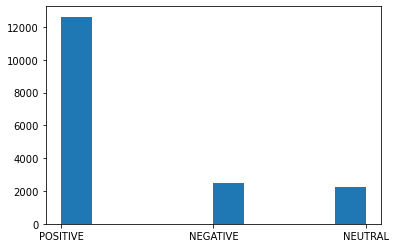

In [53]:
plt.hist(iphone_Data['sentiment_type'])
plt.show()

In [54]:
iphone_Data.shape

(17352, 11)

In [55]:
# separating Dependent and independent features 
x= iphone_Data.iloc[:,0:10]    # Independent

In [56]:
x.head()

,Reviews,cleaned_reviews,Tokens,POS_Tagging,Lemmas,neg,neu,pos,compound,scores
0,"If to say in a nutshell, product is MORE THAN ...",say nutshell product excellent experience say ...,"[say, nutshell, product, excellent, experience...","[(say, v), (nutshell, a), (product, n), (excel...",say nutshell product excellent experience sa...,0.033,0.664,0.304,0.9971,"{'neg': 0.033, 'neu': 0.664, 'pos': 0.304, 'co..."
1,Ordered this product on 8th of July and I rece...,order product 8th july receive 9th pros con pr...,"[order, product, 8th, july, receive, 9th, pros...","[(order, n), (product, n), (8th, None), (july,...",order product 8th july receive 9th pro con p...,0.105,0.649,0.246,0.8979,"{'neg': 0.105, 'neu': 0.649, 'pos': 0.246, 'co..."
2,"Pros : touch is great, phone response time is ...",pros touch great phone response time superb du...,"[pros, touch, great, phone, response, time, su...","[(pros, n), (touch, a), (great, a), (phone, n)...",pro touch great phone response time superb d...,0.047,0.748,0.205,0.9360,"{'neg': 0.047, 'neu': 0.748, 'pos': 0.205, 'co..."
3,Can be A very good gifts to older peoples.... ...,good gift older people need much memory space ...,"[good, gift, older, people, need, much, memory...","[(good, a), (gift, n), (older, a), (people, n)...",good gift old people need much memory space ...,0.000,0.418,0.582,0.9821,"{'neg': 0.0, 'neu': 0.418, 'pos': 0.582, 'comp..."
4,"Buy, if your Budget is below 13K.I am using th...",buy budget 13k use iphone 4s ten months feel t...,"[buy, budget, 13k, use, iphone, 4s, ten, month...","[(buy, v), (budget, n), (13k, None), (use, n),...",buy budget 13k use iphone 4s ten month feel ...,0.047,0.707,0.246,0.9794,"{'neg': 0.047, 'neu': 0.707, 'pos': 0.246, 'co..."


In [57]:
y = iphone_Data.iloc[:,-1:]

In [58]:
y.head()

,sentiment_type
0,POSITIVE
1,POSITIVE
2,POSITIVE
3,POSITIVE
4,POSITIVE


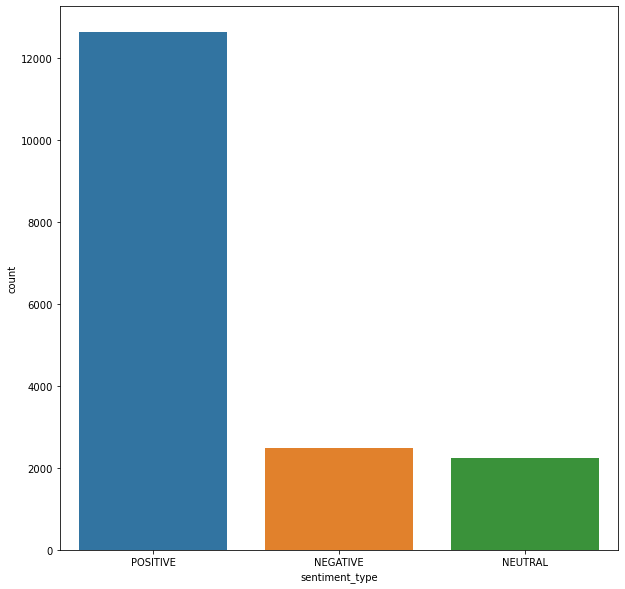

In [59]:
plt.figure(figsize=(10,10))
sns.countplot(x=y['sentiment_type'])
plt.rcParams["figure.autolayout"] = True

plt.show()

In [60]:
iphone_Data.head()

,Reviews,cleaned_reviews,Tokens,POS_Tagging,Lemmas,neg,neu,pos,compound,scores,sentiment_type
0,"If to say in a nutshell, product is MORE THAN ...",say nutshell product excellent experience say ...,"[say, nutshell, product, excellent, experience...","[(say, v), (nutshell, a), (product, n), (excel...",say nutshell product excellent experience sa...,0.033,0.664,0.304,0.9971,"{'neg': 0.033, 'neu': 0.664, 'pos': 0.304, 'co...",POSITIVE
1,Ordered this product on 8th of July and I rece...,order product 8th july receive 9th pros con pr...,"[order, product, 8th, july, receive, 9th, pros...","[(order, n), (product, n), (8th, None), (july,...",order product 8th july receive 9th pro con p...,0.105,0.649,0.246,0.8979,"{'neg': 0.105, 'neu': 0.649, 'pos': 0.246, 'co...",POSITIVE
2,"Pros : touch is great, phone response time is ...",pros touch great phone response time superb du...,"[pros, touch, great, phone, response, time, su...","[(pros, n), (touch, a), (great, a), (phone, n)...",pro touch great phone response time superb d...,0.047,0.748,0.205,0.9360,"{'neg': 0.047, 'neu': 0.748, 'pos': 0.205, 'co...",POSITIVE
3,Can be A very good gifts to older peoples.... ...,good gift older people need much memory space ...,"[good, gift, older, people, need, much, memory...","[(good, a), (gift, n), (older, a), (people, n)...",good gift old people need much memory space ...,0.000,0.418,0.582,0.9821,"{'neg': 0.0, 'neu': 0.418, 'pos': 0.582, 'comp...",POSITIVE
4,"Buy, if your Budget is below 13K.I am using th...",buy budget 13k use iphone 4s ten months feel t...,"[buy, budget, 13k, use, iphone, 4s, ten, month...","[(buy, v), (budget, n), (13k, None), (use, n),...",buy budget 13k use iphone 4s ten month feel ...,0.047,0.707,0.246,0.9794,"{'neg': 0.047, 'neu': 0.707, 'pos': 0.246, 'co...",POSITIVE


# VECTORIZATION

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_train,x_test,y_train,y_test = train_test_split(iphone_Data['cleaned_reviews'],iphone_Data['sentiment_type'],test_size=0.20,shuffle=True)

In [63]:
x_train.shape,y_train.shape

((13881,), (13881,))

In [64]:
x_train.head()

11764    anond thirty-three thousand , four hundred nin...
15349    ruan nineteen oct 2012hi people currently use ...
1702                 fully feature phone plan purchase guy
5855     love phone issue get free upgrade choose anoth...
11958                              come radio curious know
Name: cleaned_reviews, dtype: object

In [65]:
x_test.shape,y_test.shape

((3471,), (3471,))

In [66]:
y_train.head()

11764    POSITIVE
15349    POSITIVE
1702      NEUTRAL
5855     POSITIVE
11958    POSITIVE
Name: sentiment_type, dtype: object

In [67]:
type(x_test)

pandas.core.series.Series

In [68]:
type(y_test)

pandas.core.series.Series

# TF -IDF

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(use_idf=True)
tf_x_train = tfidf_vectorizer.fit_transform(x_train)
tf_x_test = tfidf_vectorizer.transform(x_test)

In [70]:
print(tf_x_train)

  (0, 2893)	0.23900733350350542
  (0, 6256)	0.21522548264983213
  (0, 5877)	0.1264180414734874
  (0, 12317)	0.2505823703527919
  (0, 5968)	0.14540856859346096
  (0, 15076)	0.16196445338440926
  (0, 11928)	0.20927089113607286
  (0, 5764)	0.1784969016605702
  (0, 544)	0.1040831131743485
  (0, 7282)	0.08344754619723892
  (0, 2115)	0.15541048102230184
  (0, 9885)	0.22876581856430397
  (0, 7750)	0.33626165284185267
  (0, 10464)	0.08216877062101723
  (0, 9328)	0.15602337538522537
  (0, 2527)	0.1370877854824234
  (0, 10580)	0.24882716848389397
  (0, 14111)	0.12485794270622338
  (0, 5300)	0.24184590599020495
  (0, 12297)	0.17734240237657858
  (0, 14119)	0.2006975731795269
  (0, 9409)	0.21685015496431936
  (0, 6645)	0.15097711425864765
  (0, 5583)	0.13825026790530226
  (0, 13751)	0.21614079480535753
  :	:
  (13880, 8808)	0.12571756463559255
  (13880, 10736)	0.09810547113099699
  (13880, 3876)	0.1011676453301667
  (13880, 12653)	0.11234513039777586
  (13880, 12405)	0.13180237861733207
  (13880, 

In [71]:
Data_models = pd.DataFrame(columns = ['Model','Train_Accuracy','Test_Accuracy'])

# MODEL BUILDING 

## 1.LOGISTIC REGRESSION

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import f1_score,roc_auc_score,roc_curve

In [73]:
logistic_model = LogisticRegression(max_iter=1000,solver='saga')
logistic_model.fit(tf_x_train,y_train)

LogisticRegression(max_iter=1000, solver='saga')

In [74]:
# PERFORMING MODEL TESTING AND MODEL EVALUATION

#training dataset
y_pred_train=logistic_model.predict(tf_x_train)
y_pred_train

array(['POSITIVE', 'POSITIVE', 'POSITIVE', ..., 'NEGATIVE', 'POSITIVE',
       'POSITIVE'], dtype=object)

In [75]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy :",accuracy_score(y_train,y_pred_train))
print('Classification Report:\n',classification_report(y_train,y_pred_train))
print('Confusion Matrix:\n',confusion_matrix(y_train,y_pred_train))

Accuracy : 0.9312729630430084
Classification Report:
               precision    recall  f1-score   support

    NEGATIVE       0.96      0.71      0.82      2010
     NEUTRAL       0.95      0.82      0.88      1803
    POSITIVE       0.92      0.99      0.96     10068

    accuracy                           0.93     13881
   macro avg       0.94      0.84      0.89     13881
weighted avg       0.93      0.93      0.93     13881

Confusion Matrix:
 [[ 1427    64   519]
 [   24  1484   295]
 [   39    13 10016]]


In [76]:
#test data
y_pred_test=logistic_model.predict(tf_x_test)
y_pred_test

array(['POSITIVE', 'POSITIVE', 'POSITIVE', ..., 'NEGATIVE', 'NEGATIVE',
       'POSITIVE'], dtype=object)

In [77]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy :",accuracy_score(y_test,y_pred_test))
print('Classification Report:\n',classification_report(y_test,y_pred_test))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred_test))

Accuracy : 0.8697781619129934
Classification Report:
               precision    recall  f1-score   support

    NEGATIVE       0.85      0.49      0.62       475
     NEUTRAL       0.82      0.62      0.71       433
    POSITIVE       0.88      0.98      0.93      2563

    accuracy                           0.87      3471
   macro avg       0.85      0.70      0.75      3471
weighted avg       0.87      0.87      0.86      3471

Confusion Matrix:
 [[ 231   38  206]
 [  19  268  146]
 [  23   20 2520]]


In [78]:
logistic_model_train =accuracy_score(y_train,y_pred_train)
logistic_model_test=accuracy_score(y_test,y_pred_test)

Data_models.loc[1,'Model'] = 'Logistic Regression'
Data_models.loc[1,"Train_Accuracy"] = logistic_model_train
Data_models.loc[1,"Test_Accuracy"] = logistic_model_test

## 2. SVM

In [79]:
from sklearn.svm import LinearSVC
svm_data= LinearSVC(random_state=123)
svm_model=svm_data.fit(tf_x_train,y_train)
svm_model

LinearSVC(random_state=123)

In [80]:
svm_pred_train_y = svm_model.predict(tf_x_train)
svm_pred_train_y

array(['POSITIVE', 'POSITIVE', 'NEUTRAL', ..., 'NEGATIVE', 'POSITIVE',
       'POSITIVE'], dtype=object)

In [81]:
svm_pred_test_y = svm_model.predict(tf_x_test)
svm_pred_test_y

array(['POSITIVE', 'POSITIVE', 'POSITIVE', ..., 'NEGATIVE', 'NEGATIVE',
       'POSITIVE'], dtype=object)

In [82]:
print("Training Accuracy :",accuracy_score(y_train,svm_pred_train_y))
print("Testing Accuracy : ",accuracy_score(y_test, svm_pred_test_y))

Training Accuracy : 0.9865283481017217
Testing Accuracy :  0.9063670411985019


In [83]:
svm_train =accuracy_score(y_train,svm_pred_train_y)
svm_test=accuracy_score(y_test,svm_pred_test_y)


Data_models.loc[2,'Model'] = 'SVM'
Data_models.loc[2,"Train_Accuracy"] = svm_train
Data_models.loc[2,"Test_Accuracy"] = svm_test

##  3. NAIVE BAYES

In [84]:
naive_bayes=MultinomialNB()
naive_bayes_classifier=naive_bayes.fit(tf_x_train, y_train)
naive_bayes_classifier

MultinomialNB()

In [85]:
y_pred_train_nbc=naive_bayes_classifier.predict(tf_x_train)
y_pred_train_nbc

array(['POSITIVE', 'POSITIVE', 'POSITIVE', ..., 'POSITIVE', 'POSITIVE',
       'POSITIVE'], dtype='<U8')

In [86]:
y_pred_test_nbc=naive_bayes_classifier.predict(tf_x_test)
y_pred_test_nbc

array(['POSITIVE', 'POSITIVE', 'POSITIVE', ..., 'POSITIVE', 'POSITIVE',
       'POSITIVE'], dtype='<U8')

In [87]:
print("Training Accuracy :",accuracy_score(y_train,y_pred_train_nbc))
print("Testing Accuracy : ",accuracy_score(y_test, y_pred_test_nbc))

Training Accuracy : 0.7355377854621425
Testing Accuracy :  0.7412849322961682


In [88]:
nbc_train =accuracy_score(y_train,y_pred_train_nbc)
nbc_test=accuracy_score(y_test, y_pred_test_nbc)

Data_models.loc[3,'Model'] = 'NAIVE BAYES'
Data_models.loc[3,"Train_Accuracy"] = nbc_train
Data_models.loc[3,"Test_Accuracy"] = nbc_test

## 4.KNN

In [89]:
knn=KNeighborsClassifier(n_neighbors=5)
knn_classifier=knn.fit(tf_x_train,y_train)

In [90]:
y_pred_train_knn  =  knn_classifier.predict(tf_x_train)
y_pred_train_knn

array(['POSITIVE', 'POSITIVE', 'POSITIVE', ..., 'POSITIVE', 'POSITIVE',
       'POSITIVE'], dtype=object)

In [91]:
y_pred_test_knn  =  knn_classifier.predict(tf_x_test)
y_pred_test_knn

array(['NEUTRAL', 'POSITIVE', 'POSITIVE', ..., 'NEGATIVE', 'NEGATIVE',
       'POSITIVE'], dtype=object)

In [92]:
print("Training Accuracy :",accuracy_score(y_train,y_pred_train_knn))
print("Testing Accuracy : ",accuracy_score(y_test, y_pred_test_knn))

Training Accuracy : 0.808659318492904
Testing Accuracy :  0.7254393546528378


In [93]:
knn_train =accuracy_score(y_train,y_pred_train_knn)
knn_test=accuracy_score(y_test, y_pred_test_knn)

Data_models.loc[4,'Model']          = 'KNN'
Data_models.loc[4,"Train_Accuracy"] = knn_train
Data_models.loc[4,"Test_Accuracy"]  = knn_test

## 5. DECISION TREE  

In [94]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier_gini = DecisionTreeClassifier(criterion = 'gini', random_state = 123,ccp_alpha=0.0010 )
dt_classifier_gini.fit(tf_x_train, y_train)
DecisionTreeClassifier(ccp_alpha=0.001, random_state=123)

DecisionTreeClassifier(ccp_alpha=0.001, random_state=123)

In [95]:
## USING ENTROPY PERFORMIG MODEL TRAINING 

y_pred_train_gini=dt_classifier_gini.predict(tf_x_train)
y_pred_train_gini

array(['POSITIVE', 'POSITIVE', 'POSITIVE', ..., 'NEGATIVE', 'POSITIVE',
       'POSITIVE'], dtype=object)

In [96]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy :",accuracy_score(y_train,y_pred_train_gini))
print("classification_report:",classification_report(y_train,y_pred_train_gini))
print("confusion_matrix:",confusion_matrix(y_train,y_pred_train_gini))

Accuracy : 0.782508464808011
classification_report:               precision    recall  f1-score   support

    NEGATIVE       0.78      0.17      0.28      2010
     NEUTRAL       0.55      0.59      0.57      1803
    POSITIVE       0.82      0.94      0.88     10068

    accuracy                           0.78     13881
   macro avg       0.72      0.57      0.58     13881
weighted avg       0.78      0.78      0.75     13881

confusion_matrix: [[ 339  343 1328]
 [   7 1068  728]
 [  88  525 9455]]


In [97]:
#TEST DATA
y_pred_test_gini=dt_classifier_gini.predict(tf_x_test)
y_pred_test_gini

array(['NEUTRAL', 'POSITIVE', 'POSITIVE', ..., 'POSITIVE', 'NEGATIVE',
       'POSITIVE'], dtype=object)

In [98]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy:",accuracy_score(y_test,y_pred_test_gini))
print("classification_report:",classification_report(y_test,y_pred_test_gini))
print("confusion_matrix:",confusion_matrix(y_test,y_pred_test_gini))

Accuracy: 0.7896859694612504
classification_report:               precision    recall  f1-score   support

    NEGATIVE       0.70      0.16      0.26       475
     NEUTRAL       0.54      0.61      0.57       433
    POSITIVE       0.83      0.94      0.88      2563

    accuracy                           0.79      3471
   macro avg       0.69      0.57      0.57      3471
weighted avg       0.78      0.79      0.76      3471

confusion_matrix: [[  77   93  305]
 [   1  262  170]
 [  32  129 2402]]


In [99]:
decision_tree_model_train =accuracy_score(y_train,y_pred_train_gini)
decision_tree_model_test=accuracy_score(y_test,y_pred_test_gini)

Data_models.loc[5,'Model'] = 'Decision Tree (Gini)'
Data_models.loc[5,"Train_Accuracy"] = decision_tree_model_train
Data_models.loc[5,"Test_Accuracy"] = decision_tree_model_test

In [100]:
def get_percentage(num):
    return "{:.2f}".format(num*100)

In [101]:
Data_models["Train_Accuracy"] = Data_models["Train_Accuracy"].apply(get_percentage)
Data_models["Test_Accuracy"]  = Data_models["Test_Accuracy"].apply(get_percentage)
Data_models

,Model,Train_Accuracy,Test_Accuracy
1,Logistic Regression,93.13,86.98
2,SVM,98.65,90.64
3,NAIVE BAYES,73.55,74.13
4,KNN,80.87,72.54
5,Decision Tree (Gini),78.25,78.97


In [102]:
 iphone_Data.head(5000)

,Reviews,cleaned_reviews,Tokens,POS_Tagging,Lemmas,neg,neu,pos,compound,scores,sentiment_type
0,"If to say in a nutshell, product is MORE THAN ...",say nutshell product excellent experience say ...,"[say, nutshell, product, excellent, experience...","[(say, v), (nutshell, a), (product, n), (excel...",say nutshell product excellent experience sa...,0.033,0.664,0.304,0.9971,"{'neg': 0.033, 'neu': 0.664, 'pos': 0.304, 'co...",POSITIVE
1,Ordered this product on 8th of July and I rece...,order product 8th july receive 9th pros con pr...,"[order, product, 8th, july, receive, 9th, pros...","[(order, n), (product, n), (8th, None), (july,...",order product 8th july receive 9th pro con p...,0.105,0.649,0.246,0.8979,"{'neg': 0.105, 'neu': 0.649, 'pos': 0.246, 'co...",POSITIVE
2,"Pros : touch is great, phone response time is ...",pros touch great phone response time superb du...,"[pros, touch, great, phone, response, time, su...","[(pros, n), (touch, a), (great, a), (phone, n)...",pro touch great phone response time superb d...,0.047,0.748,0.205,0.9360,"{'neg': 0.047, 'neu': 0.748, 'pos': 0.205, 'co...",POSITIVE
3,Can be A very good gifts to older peoples.... ...,good gift older people need much memory space ...,"[good, gift, older, people, need, much, memory...","[(good, a), (gift, n), (older, a), (people, n)...",good gift old people need much memory space ...,0.000,0.418,0.582,0.9821,"{'neg': 0.0, 'neu': 0.418, 'pos': 0.582, 'comp...",POSITIVE
4,"Buy, if your Budget is below 13K.I am using th...",buy budget 13k use iphone 4s ten months feel t...,"[buy, budget, 13k, use, iphone, 4s, ten, month...","[(buy, v), (budget, n), (13k, None), (use, n),...",buy budget 13k use iphone 4s ten month feel ...,0.047,0.707,0.246,0.9794,"{'neg': 0.047, 'neu': 0.707, 'pos': 0.246, 'co...",POSITIVE
...,...,...,...,...,...,...,...,...,...,...,...
5088,One of the best apple phones I still own. Love...,one best apple phone still love design durabil...,"[one, best, apple, phone, still, love, design,...","[(one, None), (best, a), (apple, n), (phone, n...",one best apple phone still love design durab...,0.000,0.455,0.545,0.8555,"{'neg': 0.0, 'neu': 0.455, 'pos': 0.545, 'comp...",POSITIVE
5089,Great work for years intell the updates than i...,great work years intell update start mess stil...,"[great, work, years, intell, update, start, me...","[(great, a), (work, n), (years, n), (intell, v...",great work year intell update start mess sti...,0.146,0.468,0.386,0.6249,"{'neg': 0.146, 'neu': 0.468, 'pos': 0.386, 'co...",POSITIVE
5090,Lo tengo desde hace varios años y me funciono ...,lo tengo desde hace varios anos funciono perfe...,"[lo, tengo, desde, hace, varios, anos, funcion...","[(lo, n), (tengo, n), (desde, n), (hace, n), (...",lo tengo desde hace varios anos funciono per...,0.000,0.869,0.131,0.7351,"{'neg': 0.0, 'neu': 0.869, 'pos': 0.131, 'comp...",POSITIVE
5091,very very dissatisfied I don't know how many t...,dissatisfy know many time break barely last year,"[dissatisfy, know, many, time, break, barely, ...","[(dissatisfy, n), (know, v), (many, a), (time,...",dissatisfy know many time break barely last ...,0.314,0.686,0.000,-0.4939,"{'neg': 0.314, 'neu': 0.686, 'pos': 0.0, 'comp...",NEGATIVE


In [103]:
new_data = ['I got it before the estimated date',
           'I am regular customer on Amazon',
           'good phone but battery life very poor',
           'Product and delivery is good',
           'Nice phone, back in the days when i used it']


In [104]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [105]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [106]:
import re
import contractions
from nltk.corpus import stopwords

In [107]:
new_clean_data = list(map(cleantext, new_data))
new_clean_data

['get estimate date',
 'regular customer amazon',
 'good phone battery life poor',
 'product delivery good',
 'nice phone back days use']

In [108]:
new_data_tf = tfidf_vectorizer.transform(new_clean_data)
new_data_tf

<5x15306 sparse matrix of type '<class 'numpy.float64'>'
	with 19 stored elements in Compressed Sparse Row format>

In [109]:
svm_pred_train_y = svm_model.predict(new_data_tf)
svm_pred_train_y

array(['NEUTRAL', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE'],
      dtype=object)

In [110]:
import pickle

In [111]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [112]:
import joblib

In [113]:
pickle_out = open("model_sentiment.pkl","wb")
pickle_out=joblib.dump(svm_model,pickle_out)
pickle_out

In [114]:
pickle_out_tfidf = open("model_sentiment_tfidf.pkl","wb")
pickle_out_tfidf=joblib.dump(tfidf_vectorizer,pickle_out_tfidf)
pickle_out_tfidf

In [115]:
reviewText = "worst phone ever dissapointed issue problems"

In [116]:
cleanReviewText = cleantext(reviewText)
cleanReviewText

'worst phone ever dissapointed issue problems'

In [117]:
textTfIDF = tfidf_vectorizer.transform([cleanReviewText])

In [118]:
predictedOutput=svm_model.predict(textTfIDF)
predictedOutput = predictedOutput[0]
predictedOutput

'NEGATIVE'

In [119]:
prdictionDist = svm_model._predict_proba_lr(textTfIDF)
prdictionDist


array([[0.71236848, 0.18108934, 0.10654218]])

In [120]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [121]:
from tabulate import tabulate
dfRes = pd.DataFrame(columns=['Negative', 'Positive','Neutral'])
dfRes.loc[1, 'Negative'] = get_percentage(prdictionDist[0][0])
dfRes.loc[1, 'Neutral'] = get_percentage(prdictionDist[0][1])
dfRes.loc[1, 'Positive'] = get_percentage(prdictionDist[0][2])

In [122]:
print(tabulate(dfRes, headers=dfRes.columns, tablefmt="fancy_grid", showindex="never"))

╒════════════╤════════════╤═══════════╕
│   Negative │   Positive │   Neutral │
╞════════════╪════════════╪═══════════╡
│      71.24 │      10.65 │     18.11 │
╘════════════╧════════════╧═══════════╛
